In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
test_data = pd.read_csv(r'C:\Users\Natalia\Downloads\ab_test_data.csv')

print(test_data)

                                    user_id                   timestamp  \
0      7f6833e6-1141-4f20-b4b2-f1e31019b1fd  2023-07-04 04:40:55.848109   
1      e6a6e960-d3f3-4074-a516-ba1e609b211e  2023-07-06 00:26:45.486187   
2      4d3fbfa5-6847-410a-bac2-477f01d5f400  2023-07-10 20:24:33.639464   
3      361457d9-a044-48f7-981c-d67dc3861679  2023-07-20 07:04:49.957013   
4      285cd63d-7d03-427f-a062-1fa2dd2e77d6  2023-07-19 23:27:50.116680   
...                                     ...                         ...   
19993  6763ae9a-515c-473e-af00-0d9c4f6a5bc7  2023-07-06 03:27:37.041104   
19994  ac5600f2-4d16-4503-b115-f1a96728b6d1  2023-07-03 04:20:48.572143   
19995  5a8b2630-209b-4d83-b47f-0f3d9dd568a8  2023-07-23 16:23:49.211910   
19996  b572d68b-26ac-432b-9f88-83e0fdee4ca1  2023-07-03 18:26:20.880675   
19997  3d313adc-c8d6-43f2-8b4e-e267b194ff78  2023-07-19 13:15:37.562340   

      test_group  conversion  
0              a           0  
1              b           0  
2     

In [5]:
#Зчитуємо дані з файлу та виводимо інформацію про результати A/B тесту:

#Кількість користувачів в групах A та B
a = test_data.loc[test_data['test_group'] == 'a']
b = test_data.loc[test_data['test_group'] == 'b']
print('Users number in group A: ' ,a['test_group'].count())
print('Users number in group B: ' ,b['test_group'].count())

#Кількість конверсій в групах A та B
print('Conversion number in group A:',a['conversion'].sum())
print('Conversion number in group B:',b['conversion'].sum())

#Рівень конверсії в групах A та B
ca=round(a['conversion'].sum()/a['test_group'].count()*100,2)
cb=round(b['conversion'].sum()/b['test_group'].count()*100,2)
print('Conversion level in group A: ',ca,'%')
print('Conversion level in group B: ',cb,'%')

#Дата початку тесту, дата кінця тесту та тривалість тесту в днях
test_data['timestamp']=pd.to_datetime(test_data['timestamp']).dt.date
print('Start test: ',test_data['timestamp'].min())
print('End test: ', test_data['timestamp'].max())
print('Test duration in days: ',(test_data['timestamp'].max()-test_data['timestamp'].min()).days)

Users number in group A:  10013
Users number in group B:  9985
Conversion number in group A: 611
Conversion number in group B: 889
Conversion level in group A:  6.1 %
Conversion level in group B:  8.9 %
Start test:  2023-07-03
End test:  2023-07-25
Test duration in days:  22


In [6]:
#Обраховуємо значення статистики та p-value. Перевіряємо, чи можемо ми відхили нульову гіпотезу
alpha = 0.05

statistic, pvalue = stats.ttest_ind(test_data[test_data['test_group'] == 'a' ] ['conversion'],
                                    test_data[test_data['test_group'] == 'b' ] ['conversion'],
                                    alternative = 'less'
                                   )

print(f't-statistic: {round(statistic,2)}, p-value:{round(pvalue,2)}')

if pvalue < alpha:
    print('The difference is statistically significant, Null Hypothesis is rejected.')
else:
    print('The difference is insignificant, Null Hypothesis cannot rejected.')



t-statistic: -7.53, p-value:0.0
The difference is statistically significant, Null Hypothesis is rejected.


In [ ]:
#Перевірка, чи дані розподілені нормально
a_size = len(a)
permutations_number = 1_000
sample_means = []

for _ in range (permutations_number):
    sample = np.random.choice(all_users, a_size)
    sample_means.append(sample.mean())
    
len(sample_means)

In [ ]:
#Перевірка, чи дані розподілені нормально VISUALISATION
#-> we have a NORMAL distribution
density_plot = sns.kdeplot(
    sample_means,
    fill = True
)

density_plot.set(
xlabel = 'Mean of the sample',
ylabel = 'Number pf groups',
title ='means distribution')

plt.show()

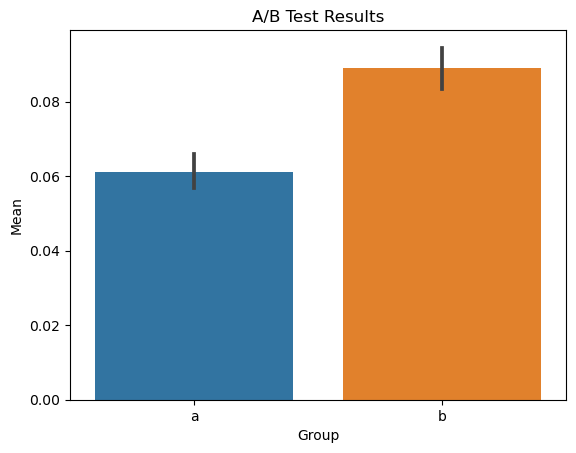

In [7]:
#Будуємо візуалізацію для порівняння середніх значень у групах з 95% довірчими інтервалами
sns.barplot(x=test_data['test_group'],
            y=test_data['conversion'],
            errorbar = ('ci', 95))       
           
plt.title('A/B Test Results')
plt.xlabel('Group')
plt.ylabel('Mean')

plt.show()

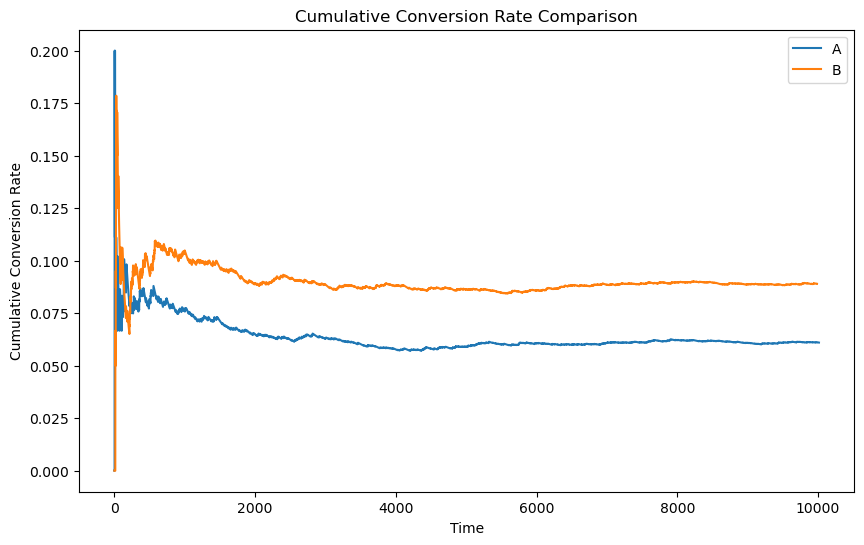

In [9]:

# Рахуємо кумулятивне середнє - це і є зміна конверсії з плином часу
cumulative_metric_a = test_data[test_data['test_group'] == 'a']['conversion'].expanding().mean().reset_index(drop=True)
cumulative_metric_b = test_data[test_data['test_group'] == 'b']['conversion'].expanding().mean().reset_index(drop=True)

plt.figure(figsize=(10, 6))
plt.plot(cumulative_metric_a, label='A')
plt.plot(cumulative_metric_b, label='B')

plt.title('Cumulative Сonversion Rate Comparison')
plt.xlabel('Time')
plt.ylabel('Cumulative Сonversion Rate')

plt.legend()
plt.show()